In [1]:
import sys
# add the code path
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

## Sample to train Yolo for object detection

In [3]:
from tfyolo3 import YoloV3, callbacks
from tfyolo3 import dataloaders
from pathlib import Path
import tensorflow as tf
from tfyolo3 import losses
import matplotlib.pyplot as plt

Define the parameters for the run

In [4]:
image_shape = (256,256,3)
batch_shape = 4
max_objects = 100
train_dataset_path = '../tests/data/manifest.txt'
anchors = dataloaders.load_anchors('../tests/data/yolov3_anchors.txt')
classes = dataloaders.load_classes('../tests/data/classes.txt')

Create the model

In [5]:
model = YoloV3(image_shape, max_objects, 
               anchors=anchors, num_classes=len(classes), 
               training=True, backbone='ResNet50V2')

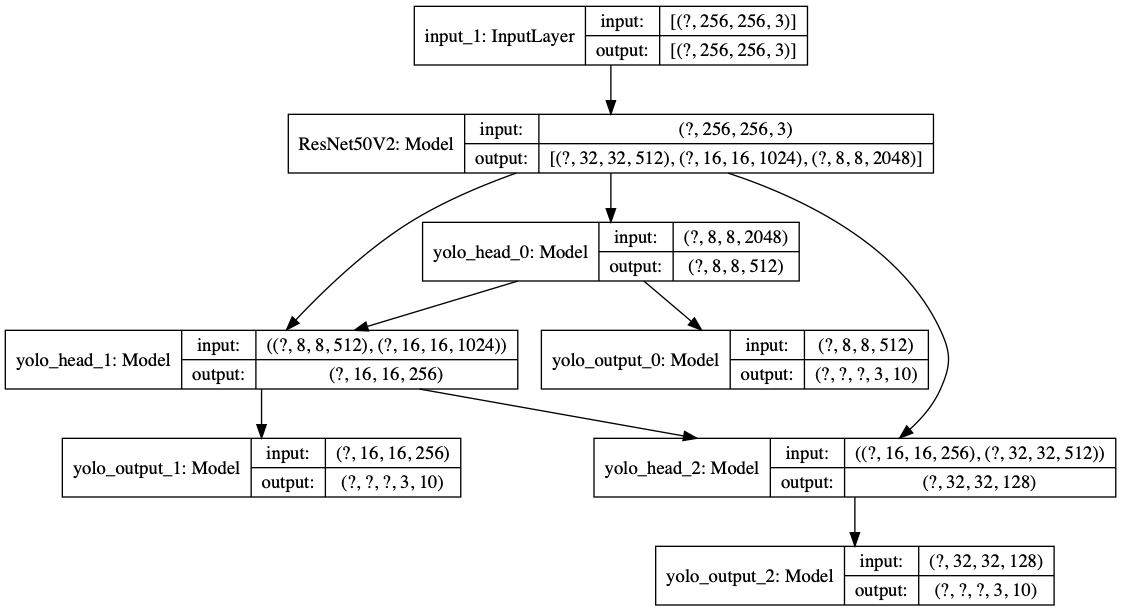

In [6]:
tf.keras.utils.plot_model(model.model, show_shapes=True)

Make optimizer and loss

In [7]:
optimizer = model.get_optimizer('adam', 1e-4)
loss = model.get_loss_function()

In [8]:
loss

[yolo_loss0 at 0x157bf9710,
 yolo_loss1 at 0x157bf9748,
 yolo_loss2 at 0x154e62400]

compile the model

In [9]:
model.compile(optimizer, loss, run_eagerly=True, summary=False)

Create the dataset

In [10]:
train_dataset = dataloaders.YoloDatasetMultiFile(
    train_dataset_path, image_shape, max_objects, batch_shape, 
    model.anchors, model.masks, len(classes)
)

In [11]:
print('num batches', len(train_dataset))

num batches 1


Create the callbacks

In [12]:
model_callbacks = callbacks.default_callbacks(model,
    run_path='./checkpoints', lrate_mode='exp_range',
    lrate_value=1e-4, verbose=0)

Set the model in transfer mode

In [13]:
model.set_mode_transfer()

In [14]:
history = model.fit(train_dataset, train_dataset, 5, callbacks=model_callbacks)

Train for 1 steps, validate for 1 steps
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 1540.4178 - yolo_output_0_loss: 111.7739 - yolo_output_1_loss: 267.7615 - yolo_output_2_loss: 1073.5143 - val_loss: 1518.9108 - val_yolo_output_0_loss: 100.8607 - val_yolo_output_1_loss: 266.1208 - val_yolo_output_2_loss: 1064.5686
Epoch 2/5
1/1 [==============================] - 7s 7s/step - loss: 1485.5446 - yolo_output_0_loss: 76.2167 - yolo_output_1_loss: 262.0888 - yolo_output_2_loss: 1059.8783 - val_loss: 1518.4663 - val_yolo_output_0_loss: 100.7552 - val_yolo_output_1_loss: 266.0034 - val_yolo_output_2_loss: 1064.3555
Epoch 3/5
1/1 [==============================] - 5s 5s/step - loss: 1489.1045 - yolo_output_0_loss: 104.4117 - yolo_output_1_loss: 254.6268 - yolo_output_2_loss: 1042.7136 - val_loss: 1517.7927 - val_yolo_output_0_loss: 100.5883 - val_yolo_output_1_loss: 265.8325 - val_yolo_output_2_loss: 1064.0259
Epoch 4/5
1/1 [==============================] - 7s 7s/step -

## Evaluate model Loss

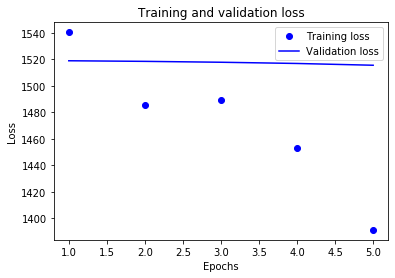

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Yolo loss for large-sized objects

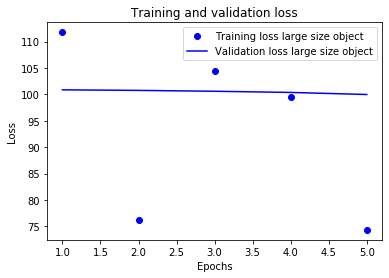

In [16]:
loss = history.history['yolo_output_0_loss']
val_loss = history.history['val_yolo_output_0_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss large size object')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss large size object')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Yolo loss for medium-sized objects

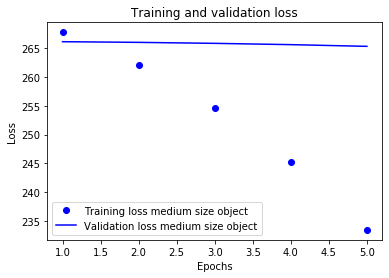

In [17]:
loss = history.history['yolo_output_1_loss']
val_loss = history.history['val_yolo_output_1_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss medium size object')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss medium size object')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Yolo loss for small-sized objects

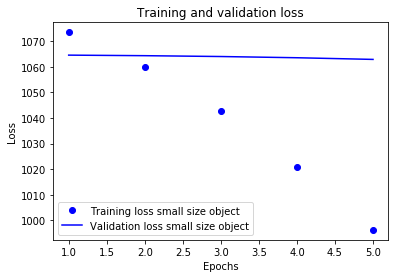

In [18]:
loss = history.history['yolo_output_2_loss']
val_loss = history.history['val_yolo_output_2_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss small size object')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss small size object')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()